# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [9]:
temp=pd.read_csv('Temp_States.csv')
temp.columns=[e.lower().replace(' ', '_') for e in temp.columns]

#### Print `temp`

In [10]:
temp

,city,state,temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [11]:
temp_types = temp.dtypes

temp_types

city            object
state           object
temperature    float64
dtype: object

#### Select the rows where state is New York

In [15]:
ny_temp = temp[temp['state'] == 'New York']

ny_temp

,city,state,temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [17]:
average_temp_ny = ny_temp['temperature'].mean()

average_temp_ny

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [18]:
degrees_15 = temp[temp['temperature'] > 15]

degrees_15

,city,state,temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [19]:
degrees_15_cities = temp[temp['temperature'] > 15]['city']

degrees_15_cities

0         NYC
3    Hartford
5      Treton
6      Newark
Name: city, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [20]:
condicion = (temp['temperature'] > 15) & (temp['temperature'] < 20)

In [22]:
cities = temp[condicion]['city']

cities

0         NYC
3    Hartford
Name: city, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [23]:
state_mean_std = temp.groupby('state')['temperature'].agg(['mean', 'std'])

state_mean_std

,mean,std
state,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [24]:
employee = pd.read_csv('Employee.csv')

In [25]:
employee.columns=[e.lower().replace(' ', '_') for e in employee.columns]

employee.head()

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [27]:
# Supongo que se trata de un fallo, voy a explorar los data_types de employee

employee_types = employee.dtypes

employee_types


name          object
department    object
education     object
gender        object
title         object
years          int64
salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

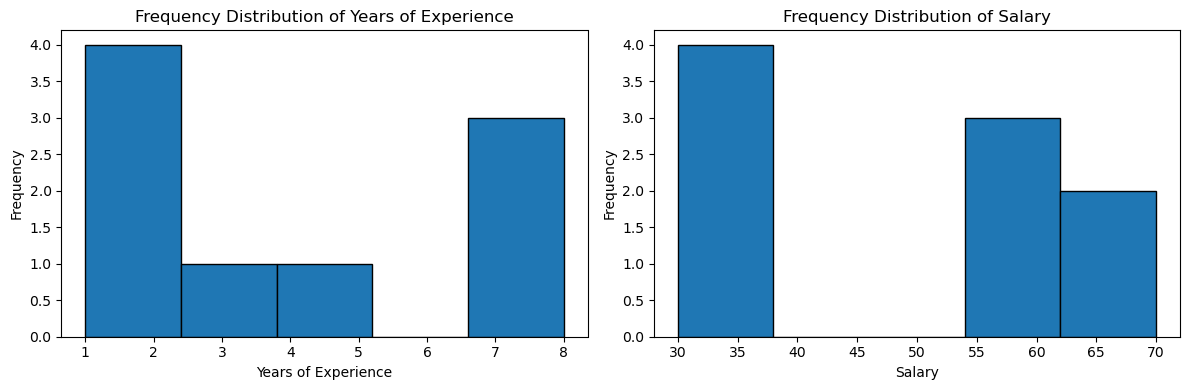

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(employee['years'], bins=5, edgecolor='k')
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Years of Experience")

plt.subplot(1, 2, 2)
plt.hist(employee['salary'], bins=5, edgecolor='k')
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Salary")

plt.tight_layout()
plt.show()

#### What's the average salary in this company?

In [30]:
average_salary = employee['salary'].mean()

average_salary

48.888888888888886

#### What's the highest salary?

In [31]:
highest_salary = employee['salary'].max()

highest_salary 

70

#### What's the lowest salary?

In [32]:
lowest_salary = employee['salary'].min()

lowest_salary

30

#### Who are the employees with the lowest salary?

In [33]:
lowest_salary = employee['salary'].min()

lowest_salary_employees = employee[employee['salary'] == lowest_salary]

lowest_salary_employees

,name,department,education,gender,title,years,salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [35]:
david = employee[employee['name'] == 'David']

david

,name,department,education,gender,title,years,salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [36]:
david_salary = employee[employee['name'] == 'David']['salary'].values[0]

david_salary

30

#### Print all the rows where job title is associate

In [37]:
associate = employee[employee['title'] == 'associate']

associate

,name,department,education,gender,title,years,salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [38]:
#1 method:
employee.head(3)

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [39]:
#2 method:
employee[:3]

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [40]:
employees_associate_salary = employee[(employee['title'] == 'associate') & (employee['salary'] > 55)]

employees_associate_salary

,name,department,education,gender,title,years,salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [41]:
employees_years_salary = employee.groupby('years')['salary'].mean()

employees_years_salary

years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: salary, dtype: float64

####  What is the average Salary per title?

In [42]:
average_salary_title = employee.groupby('title')['salary'].mean()

average_salary_title

title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

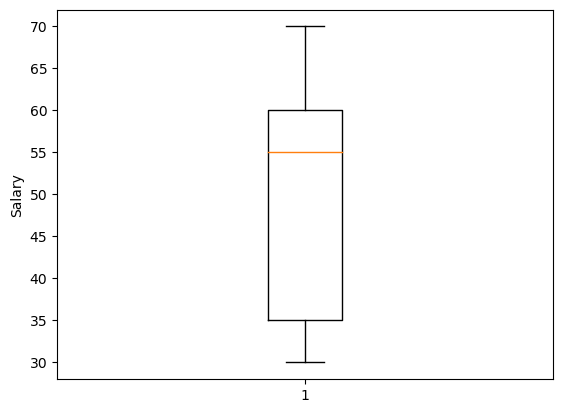

In [43]:
plt.boxplot(employee['salary'])

plt.ylabel("Salary")

plt.show()

In [44]:
first_quartile = employee['salary'].quantile(0.25)

first_quartile

35.0

In [45]:
third_quartile = employee['salary'].quantile(0.75)

third_quartile

60.0

#### Is the mean salary per gender different?

In [46]:
salary_gender = employee.groupby('gender')['salary'].mean()

salary_gender

gender
F    47.5
M    50.0
Name: salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [49]:
department_min_mean_max = employee.groupby('department').agg({
    'years': ['min', 'mean', 'max'],
    'salary': ['min', 'mean', 'max']
})
    
department_min_mean_max

years               salary           
             min      mean max    min   mean max
department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [53]:
orders = pd.read_csv('Orders.csv')

In [54]:
orders.columns=[e.lower().replace(' ', '_') for e in orders.columns]

orders.head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [55]:
orders_types = orders.dtypes

orders_types

unnamed:_0        int64
invoiceno         int64
stockcode        object
year              int64
month             int64
day               int64
hour              int64
description      object
quantity          int64
invoicedate      object
unitprice       float64
customerid        int64
country          object
amount_spent    float64
dtype: object

In [57]:
orders_stats = orders.describe().T

orders_stats

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
invoiceno,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
unitprice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
customerid,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


####  What is the average Purchase Price?

In [59]:
average_purchase_price = orders['unitprice'].mean()

average_purchase_price

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [61]:
highest_purchase = orders['unitprice'].max()

highest_purchase

8142.75

In [62]:
lowest_purchase = orders['unitprice'].min()

lowest_purchase

0.0

#### Select all the customers we have in Spain

In [63]:
customers_sp = orders[orders['country'] == 'Spain']

customers_sp

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [65]:
customers_sp = orders['country'].value_counts()['Spain']

2485

#### Select all the customers who have bought more than 50 items ?

In [70]:
customers_50_items = orders[orders['quantity'] > 50]

#customers_50_items

#### Select orders from Spain that are above 50 items

In [69]:
orders_50_sp = orders[(orders['country'] == 'Spain') & (orders['quantity'] > 50)]

#orders_50_sp

#### Select all free orders

In [72]:
free_orders = orders[orders['amount_spent'] == 0]

#free_orders

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [76]:
lunch_bag_orders = orders[orders['description'].str.contains('lunch bag', case=False, na=False)]

#lunch_bag_orders

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [94]:
orders['year'] = pd.to_datetime(orders['year'])

lunch_bag_orders_2011 = orders[(orders['year'].dt.year == 2011) & orders['description'].str.contains('lunch bag', case=False, na=False)]

#lunch_bag_orders_2011

#### Show the frequency distribution of the amount spent in Spain.

In [81]:
spain_orders = orders[orders['country'] == 'Spain']

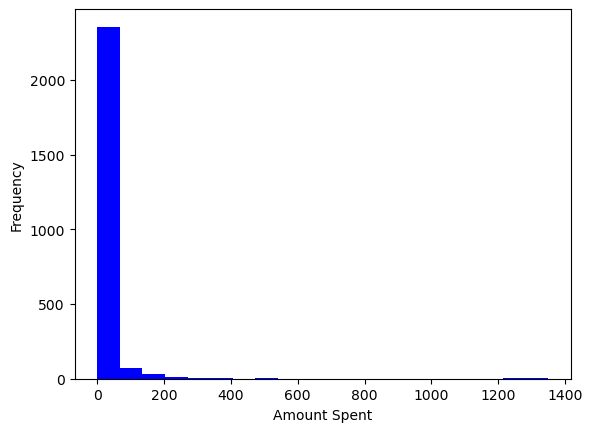

In [82]:
plt.hist(spain_orders['amount_spent'], bins=20, color='blue')

plt.xlabel("Amount Spent")
plt.ylabel("Frequency")

plt.show()


#### Select all orders made in the month of August

In [84]:
august_orders = orders[orders['month'] == 8]

#august_orders

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
august_orders = orders[orders['month'] == 8]

In [85]:
country_august_orders = august_orders['country'].value_counts()

country_august_orders

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: country, dtype: int64

#### What's the  average amount of money spent by country

In [87]:
average_spent_country = orders.groupby('country')['amount_spent'].mean()

#average_spent_country

#### What's the most expensive item?

In [90]:
most_expensive_item_index = orders['unitprice'].idxmax()

In [93]:
most_expensive_item = orders.loc[most_expensive_item_index, 'description']

most_expensive_item

'postage'

#### What was the average amount spent per year ?

In [96]:
average_amount_year = orders.groupby('year')['amount_spent'].mean()

average_amount_year

year
1970-01-01 00:00:00.000002010    21.892733
1970-01-01 00:00:00.000002011    22.430074
Name: amount_spent, dtype: float64